In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from scipy.optimize import root
PI = np.pi

In [2]:
# define path to follow
Np = 8
xp = np.vstack((np.linspace(-1.5, 1.5, Np),
                np.ones(Np) * 1.0
              )).T

In [3]:
# calulate inital configuration
q0_guess = np.array([PI / 2, PI / 4])
x0 = xp[0, :]
print x0
res = newton(x0, q0_guess)
print res
q0 = res['q']
x2, x1 = fk(q0, all_links = True)

# rescale angles
q0 = q0 % (2 * np.pi)
print q0

[-1.5  1. ]
{'q': array([ 2.10575748,  0.895666  ]), 'conv': True}
[ 2.10575748  0.895666  ]


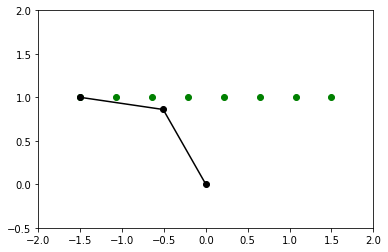

In [4]:
# plot initial configuration
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[:, 0], xp[:, 1], 'go')
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()

## Solve ik using simple newton method

In [5]:
# calculate configureation for the other path points
from numpy.linalg import cond
qsol = np.zeros((Np, 2))
qsol[0] = q0
for i in range(1, Np):
    res = newton(xp[i], qsol[i-1], alpha = 0.1)
    if res['conv']:
        qsol[i] = res['q']
    else:
        print "newton method did not converge in step: " + str(i)
        # Jk = J(qsol[i])
        # print "Jacobian condition number: " + str(cond(Jk))
        
return qsol
# print qsol

newton method did not converge in step: 3
newton method did not converge in step: 4


In [6]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 1.5])
plt.plot(xp[:, 0], xp[:, 1], 'go')
for i in range(Np):
    x2, x1 = fk(qsol[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'o-')
# plt.show()

## Solve ik using build in root finding algorithm

In [7]:
# calculate configureation for the other path points
from numpy.linalg import cond
qsol = np.zeros((Np, 2))
qsol[0] = q0
for i in range(1, Np):
    res = root(lambda q : xp[i] - fk(q), qsol[i-1])
    if res['success']:
        qsol[i] = res['x']
    else:
        print "newton method did not converge in step: " + str(i)
        # Jk = J(qsol[i])
        # print "Jacobian condition number: " + str(cond(Jk))
        
print qsol

[[ 2.10575748  0.895666  ]
 [ 1.64228905  1.49674909]
 [ 1.20786201  1.8685436 ]
 [ 0.74784918  2.06808096]
 [ 0.32566251  2.06808096]
 [ 0.06518705  1.8685436 ]
 [ 0.00255452  1.49674909]
 [ 0.14017021  0.89566479]]


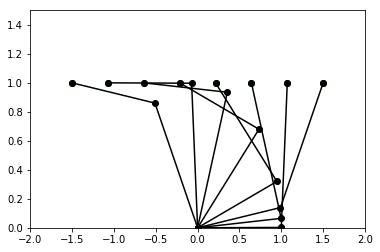

In [9]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 1.5])
plt.plot(xp[:, 0], xp[:, 1], 'go')
for i in range(Np):
    x2, x1 = fk(qsol[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()